In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
import os
import sys
import math
from random import choice, shuffle, sample, uniform

In [2]:
N = 20
X = np.random.uniform(0,1,(N,2))

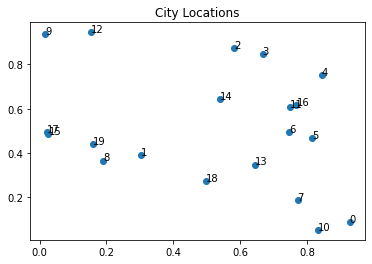

In [3]:
# Display the shuffled datapoints
plt_x,plt_y = zip(*X)
fig, ax = plt.subplots()
ax.scatter(plt_x, plt_y)
for i in range(N):
    ax.annotate(str(i), (plt_x[i], plt_y[i]))
plt.title("City Locations")
plt.show()

In [4]:
citydistances = euclidean_distances(X) # a matrix containing city to city distance
citydistances

array([[0.        , 0.69513763, 0.85681893, 0.80203565, 0.66889196,
        0.39480125, 0.44516295, 0.1843207 , 0.78766819, 1.24496509,
        0.10109237, 0.55003871, 1.15482419, 0.38469914, 0.67840202,
        0.98499625, 0.5501255 , 0.99230698, 0.46809579, 0.84606264],
       [0.69513763, 0.        , 0.55675099, 0.58303693, 0.65042103,
        0.51802864, 0.45532621, 0.51239244, 0.11491887, 0.61596777,
        0.62963725, 0.49718829, 0.57281175, 0.34428253, 0.34645272,
        0.29134757, 0.51676425, 0.29812053, 0.22861332, 0.15174225],
       [0.85681893, 0.55675099, 0.        , 0.08793881, 0.28761707,
        0.46764442, 0.41167608, 0.71141323, 0.6412579 , 0.56870088,
        0.85704073, 0.31222325, 0.43578089, 0.52830931, 0.23228916,
        0.67697637, 0.31763955, 0.6749949 , 0.60603515, 0.60420665],
       [0.80203565, 0.58303693, 0.08793881, 0.        , 0.20081181,
        0.40790101, 0.36086286, 0.6682206 , 0.67721044, 0.65535707,
        0.81100254, 0.2519991 , 0.52307474, 0

In [5]:
def GAdemo(N,citydistances):
    # Genetic Search
    ngen = 1000
    ngpool = N

    gpool = np.zeros((ngpool,N)).astype('int')
 
    for i in range(ngpool):
      # We ensure that the first element remains 0
    #  if i == 0:
    #    gpool[i] = range(N)
    #  else:
        gpool[i,1:] = (np.random.permutation(N-1) + 1)
    
        costmin = N
        tourmin = np.zeros(N)
        cost = np.zeros(ngpool)
    for i in range(ngen):
        # step 1. evaluate the fitness of current chromosomes
        # for tsp problem it is the trip length. the smaller the better
        for j in range(ngpool):
            id_shift = gpool[j,-1:].tolist() + gpool[j,:-1].tolist()
            cost[j] = np.sum(np.diag(citydistances[gpool[j,:].tolist(),id_shift]))
            
        # Record the current best solution
        costmin = np.amin(cost)
        idx = np.argmin(cost)
        tourmin = gpool[idx,:]

        #print(cost)
        #print(costmin)
        # step 2. cross breeding and mutation
        # since each chromosome is an integer vector, cross breeding
        # can not be done simply by combining binary vectors. 
        # Instead, we let the off-spring to keep the common genes of
        # the parents, and randomly shuffle genes when parents disagree
        # for simplicity, we only cross-breed the two best solutions. 
        
        ridx = sorted(range(len(cost)), key=lambda k: cost[k])
        
        
        # parents
        mother = gpool[ridx[0],:]
        father = gpool[ridx[1],:]
        # find index of genes that are the same in father and mother
        sameidx = father == mother
        diffidx = np.nonzero(1 - sameidx)[0]
        
        
        if len(diffidx <= 4): # father and mother too close!
          # do mutation
            boy = [0] + (np.random.permutation(N-1) + 1).tolist()
            girl = [0] + (np.random.permutation(N-1) + 1).tolist()
        else:
            boy = father * sameidx
            boy[diffidx] = father[diffidx[np.random.permutation(len(diffidx))]]
            girl = mother * sameidx
            girl[diffidx] = mother[diffidx[np.random.permutation(len(diffidx))]]
              
        #Replace the worst two
        gpool[ridx[-2]] = boy
        gpool[ridx[-1]] = girl
        
    return costmin

In [6]:
def SAdemo(arr):
    num = len(arr)
    
    def valSimulateAnnealSum(curnode, nextnodeList, t):
    
        if nextnodeList == None or len(nextnodeList) < 1:
            print("empty")
            return 0
    
        maxcost = sys.maxsize
        retnode = 0
    
        for node in nextnodeList:
            # print "curnode : ",curnode ," node: " ,node ," mincost : ",mincost
    
            t *= 0.98  ## 退火因子
            if arr[curnode][node] < maxcost:
                maxcost = arr[curnode][node]
                retnode = node
            else:#r = uniform(0, 1)
                r = math.exp((arr[curnode][node] - maxcost)/t)
                if arr[curnode][node] > maxcost and t > t_min and math.exp((arr[curnode][node] - maxcost) / t) > r:
                    #print " t = " ,t , "maxcost = ", maxcost , " arr = " ,arr[curnode][node],   "  exp = ",math.exp((arr[curnode][node] - maxcost)/t)  ,  " r = ",r , "t_min = " ,t_min
                    retnode = node
                    maxcost = arr[curnode][node]
                    return(retnode, maxcost, t)
                    
        return (retnode, maxcost, t)


    indexList = [i for i in range(num)]
    selectedList = []
    
    mincost = sys.maxsize
    
    count = 0
    t = 100
    t_min = 50
    while count < num:
        count += 1
        leftItemNum = len(indexList)
        #  print "leftItemNum:" ,leftItemNum
        #nextnum = leftItemNum // 10 if leftItemNum >= 10 else leftItemNum % 10
        #nextnodeList = sample(indexList, nextnum)
        if leftItemNum < 2:
            leftItemNum = 1
        else:
            leftItemNum -= 1
        
        nextnodeList = sample(indexList, leftItemNum)
        
        if len(selectedList) == 0:
            item = choice(nextnodeList)
            selectedList.append(item)
            indexList.remove(item)
            mincost = 0
            continue

        curnode = selectedList[len(selectedList) - 1]
        # print "nextnodeList:" ,nextnodeList
        nextnode, maxcost, t = valSimulateAnnealSum(curnode, indexList, t)
        
        mincost += maxcost
        indexList.remove(nextnode)
        selectedList.append(nextnode)
        
        
    return mincost

In [7]:
Trial = np.zeros([10,2])
Trial

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [8]:
for i in range(10):
    Trial[i,0] = GAdemo(N,citydistances)
    Trial[i,1] = SAdemo(citydistances)

In [9]:
import pandas as pd
Trial = pd.DataFrame(Trial)
Trial.columns = ['GA', 'SA']
Trial

,GA,SA
0,6.970130,3.368430
1,6.728027,3.798303
2,7.411224,3.226697
3,7.303517,3.430835
4,6.458224,3.200530
5,7.125490,3.368430
6,7.307561,3.498769
7,7.053076,3.601385
8,7.577628,3.368430
9,7.572138,3.811702
